In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# Загрузка данных

In [2]:
data = pd.read_csv('./train_Tele.csv')

Явно выделим численные и категориальные признаки

In [3]:
# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

Посмотрим на 5 случайных строк таблицы

In [4]:
data.sample(n = 5)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
2688,2,71.30,157.75,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),0
1372,34,85.20,2874.45,Male,1,Yes,No,Yes,No,Fiber optic,No,No,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),0
3739,29,19.55,521.8,Female,0,Yes,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,0
4992,21,80.35,1747.2,Male,0,No,Yes,Yes,Yes,Fiber optic,Yes,No,No,No,No,No,Month-to-month,No,Electronic check,0
2616,2,24.85,62,Male,0,No,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,0


Посмотрим на суммарное количество 'nan'-ов в каждом столбце и убедимся, что их нету вовсе.

In [5]:
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

Теперь при помощи метода .info() стоит узнать тип данных в каждой колонке

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [7]:
data.shape

(5282, 20)

Во-первых видно, что количество строк в таблице совпадает с количеством  'non - null' значений в каждой колонке, что подверждает отсутствие 'nan'-ов 

Во-вторых, тип колонки 'Total Spent' это 'object', что скорее всего означает наличие в них какого-то не цифрового символа. Как оказалось, в ней присутствует 9 пробельных символов ' ', а значит для дальнейшего анализа значение в столбце 'Total Spent' таких строк с таким символом следует изменить на 0. После удаления соответствующих строк изменим тип данных в 'TotalSpent' на 'float64'

In [8]:
data = data.replace(' ', 0)

data['TotalSpent'] = pd.to_numeric(data['TotalSpent'])

Проверим, что все вышло

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   float64
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [10]:
data.shape

(5282, 20)

# Анализ данных 
Подключим модуль warnings для игнорирования ненужных предупреждений

In [11]:
import warnings
warnings.filterwarnings('ignore')

Все готово для того, чтобы визуализировать наши данные. Вначале построим гистограммы для численных признаков.

Text(0.5, 1.0, 'TotalSpent')

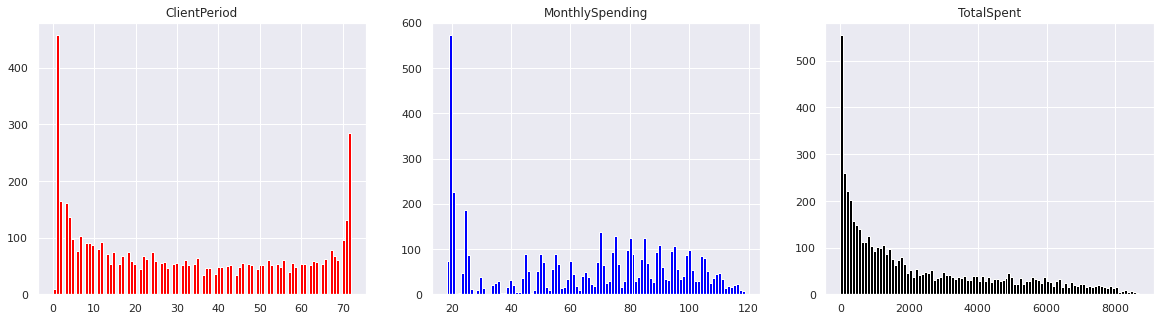

In [12]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
axs[0].hist(data['ClientPeriod'], bins=100, color='red')
axs[0].set_title('ClientPeriod')
axs[1].hist(data['MonthlySpending'], bins=100, color='blue')
axs[1].set_title('MonthlySpending')
axs[2].hist(data['TotalSpent'], bins=100, color='black')
axs[2].set_title('TotalSpent')

А теперь столбчатые диаграммы для категориальных.

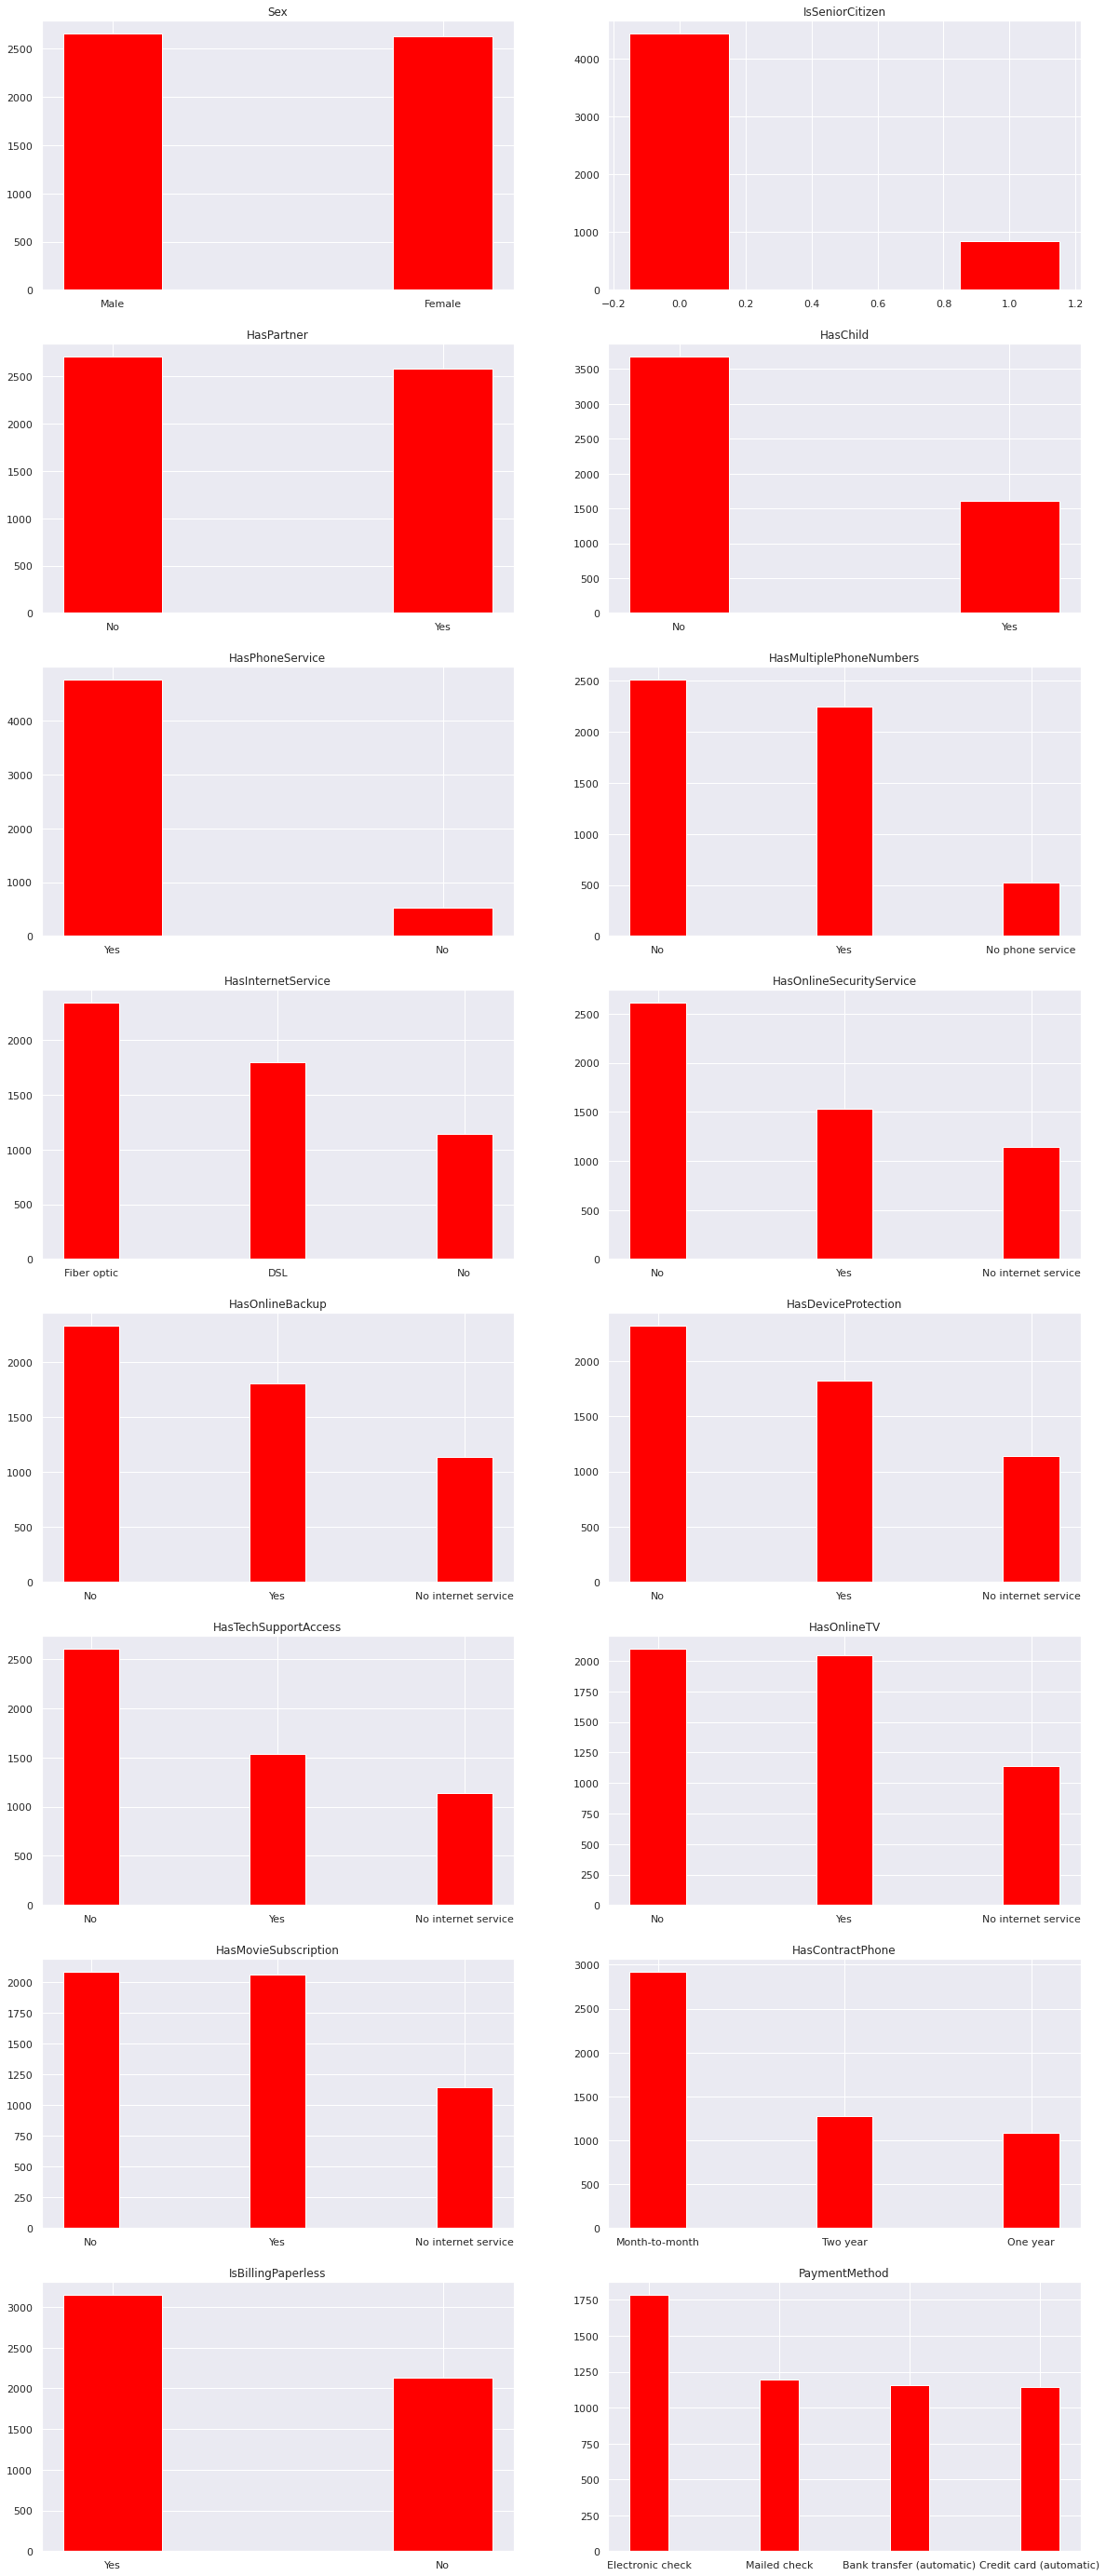

In [13]:
fig, axs = plt.subplots(8, 2, figsize=(20, 50))

axs = axs.ravel()
for index, column_name in enumerate(cat_cols):
    series = data[column_name].value_counts()
    axs[index].bar(series.index, series, color='red', width=0.3)
    axs[index].set_title(column_name)


Теперь посмотрим на распределение target переменной.

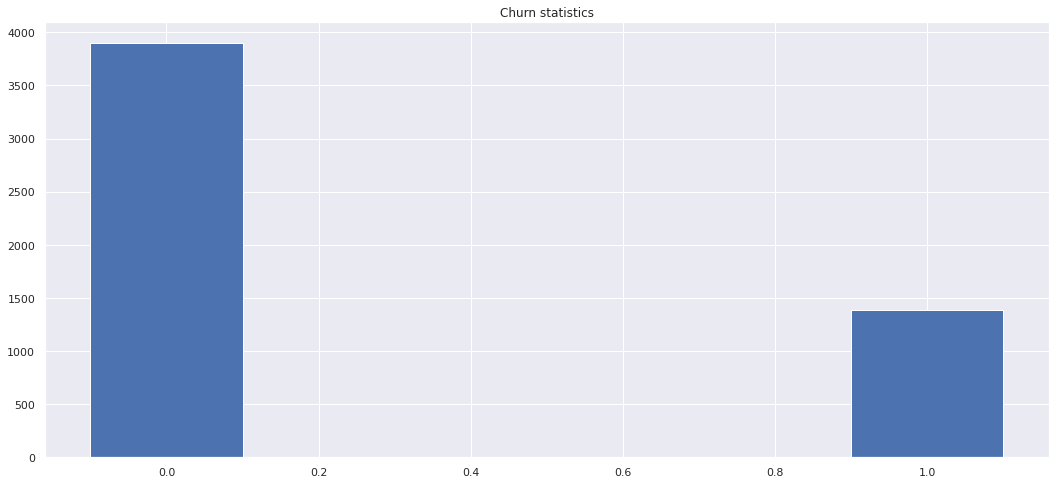

In [14]:
target_bar = data[target_col].value_counts()
plt.figure(figsize=(18, 8))
plt.bar(target_bar.index, target_bar, width=0.2)
plt.title('Churn statistics')
plt.show()

Видно, что класс ноль встречается примерно в 2-3 раза чаще, чем класс 1, поэтому данные несбалансированы. При разбиении на train и valid части следует стратифицировать данные.

Помимо основных распределений можно также взглянуть на матрицу корреляций признаков с помощью тепловой карты в модуле seaborn.
Для правильного построения тепловой карты нужно изменить тип всех категориальных признаков в тип 'int'. Сделать это можно при помощи 'LabelEncoder' из модуля 'sklearn.preprocessing'.

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
num_data = data[num_cols]
categorical_data = data[cat_cols]

labeled_data = data[num_cols]
le = LabelEncoder()
for col in cat_cols:
    le.fit(data[col].unique())
    labeled_data[col] = le.transform(data[col])

labeled_data[target_col] = data[target_col]

Посмотрим, что вышло.

In [17]:
labeled_data.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,1,0,1,1,1,0,2,1,1,1,1,1,1,1,0,3,0
1,72,25.85,1872.20,1,0,1,0,1,2,2,1,1,1,1,1,1,2,0,1,0
2,1,75.90,75.90,1,0,0,0,1,0,1,0,0,0,2,0,0,0,1,2,1
3,32,79.30,2570.00,0,1,1,0,1,2,1,0,0,2,0,0,0,0,0,3,0
4,60,115.25,6758.45,0,0,1,1,1,2,1,2,2,2,2,2,2,2,0,1,0


In [18]:
labeled_data.shape

(5282, 20)

Как видно, данные закодировались без потерь и теперь можно построить матрицу корреляции.

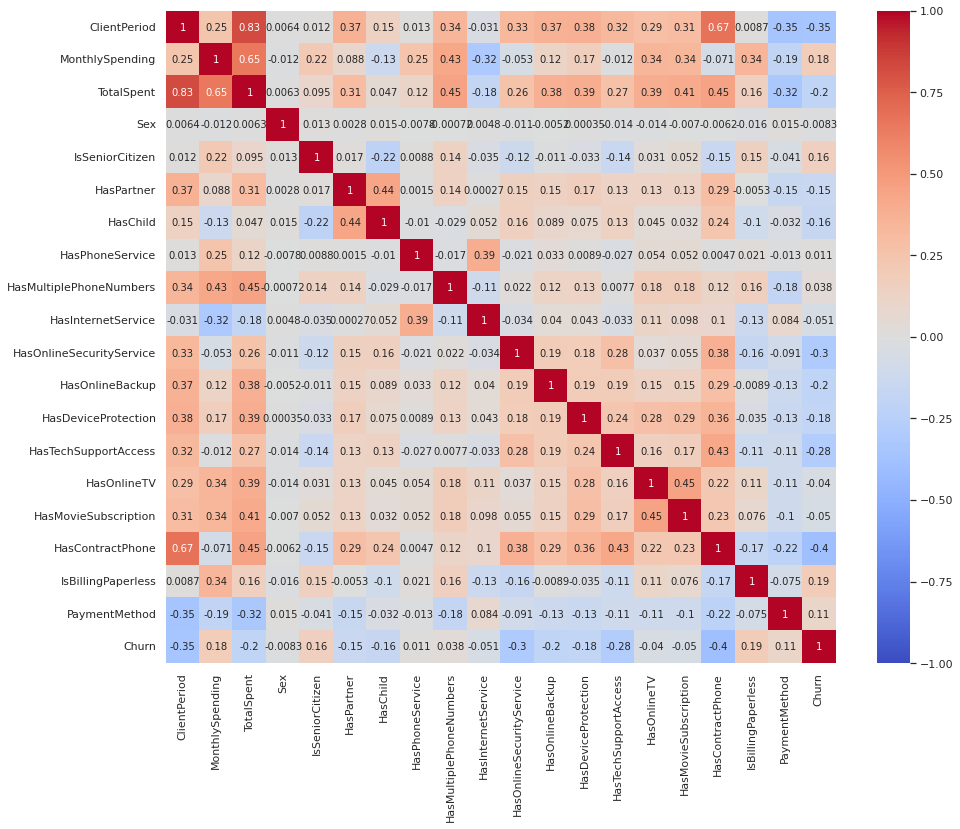

In [19]:
sns.set(rc={'figure.figsize':(15,12)})
sns.heatmap(labeled_data.corr(), annot=True, cmap='coolwarm', 
            vmin=-1, vmax=+1, annot_kws={"size": 10})

Заметим, что самое теплое нетривиальное место на карте - это коэффициенты корреляции между 'ClientPeriod' и 'TotalSpent' $\rho_{1, 3} = 0.83$ (чем дольше клиент пользуется услугами телекомпании, тем больше он уже заплатил за оказанные услуги).

# One-hoot-encoding

Для начала следует закодировать все категориальные данные в числа при помощи one-hoot-encoding. Для этого будем использовать метод get_dummies из модуля pandas. Не забудем сохранить наши начальные незакодированные признаки в X_origin (они нам понадобятся в catboost).

In [20]:
dummy_features = pd.get_dummies(categorical_data, drop_first=True)

X = pd.concat([num_data, dummy_features], axis=1)
X_origin = data.iloc[:, :-1]

y = data[target_col]

X.head()

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,Sex_Male,HasPartner_Yes,HasChild_Yes,HasPhoneService_Yes,HasMultiplePhoneNumbers_No phone service,HasMultiplePhoneNumbers_Yes,...,HasOnlineTV_No internet service,HasOnlineTV_Yes,HasMovieSubscription_No internet service,HasMovieSubscription_Yes,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,55,19.50,1026.35,0,1,1,1,1,0,0,...,1,0,1,0,1,0,0,0,0,1
1,72,25.85,1872.20,0,1,1,0,1,0,1,...,1,0,1,0,0,1,0,1,0,0
2,1,75.90,75.90,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
3,32,79.30,2570.00,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
4,60,115.25,6758.45,0,0,1,1,1,0,1,...,0,1,0,1,0,1,0,1,0,0


Теперь наши данные готовы для обучения большинства классических моделей.

# Деление выборки на train и valid части

In [21]:
from sklearn.model_selection import train_test_split

# KNN

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline

Перед тем как прогнать данные по сетке и найти лучший параметр $k$ для модели, необходимо отмасштабировать фичи при помощи StandartScaler, поэтому уместно объединить две модели в один Pipeline.

In [23]:
KNN_pipeline = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier()
)

Напишем универсальную функцию для поиска по сетке и отрисовки результатов. В качестве проверки результата будем использовать метрику 'roc-auc'.

In [24]:
KNN_pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'standardscaler', 'kneighborsclassifier', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'kneighborsclassifier__algorithm', 'kneighborsclassifier__leaf_size', 'kneighborsclassifier__metric', 'kneighborsclassifier__metric_params', 'kneighborsclassifier__n_jobs', 'kneighborsclassifier__n_neighbors', 'kneighborsclassifier__p', 'kneighborsclassifier__weights'])

In [25]:
parameters ={
    'kneighborsclassifier__n_neighbors': np.array(np.linspace(4, 30, 8), dtype='int'),
    'kneighborsclassifier__metric': ['manhattan', 'euclidean'],
    'kneighborsclassifier__weights': ['uniform', 'distance']
}

In [26]:
CV_model = GridSearchCV(estimator=KNN_pipeline, 
              param_grid=parameters,
              cv=5, 
              scoring='roc_auc',
              n_jobs=-1, 
              verbose=10)
knn = CV_model.fit(X, y)
knn.best_params_

Fitting 5 folds for each of 32 candidates, totalling 160 fits


{'kneighborsclassifier__metric': 'manhattan',
 'kneighborsclassifier__n_neighbors': 30,
 'kneighborsclassifier__weights': 'uniform'}

Лучшие параметры:

$k = 30$, uniform weights и manhattan metric

Обучим модель с таким набором параметров и проверим скор

In [27]:
y_pred_prob_KNN = knn.predict_proba(X)[:, 1]
y_pred_KNN = knn.predict(X)

In [28]:
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve

In [29]:
print(f"ROC-AUC of KNN on train samples is {roc_auc_score(y, y_pred_prob_KNN, average='macro')}")
print(f"Accuracy of KNN on train samples is {accuracy_score(y, y_pred_KNN)}")

ROC-AUC of KNN on train samples is 0.85480511719364
Accuracy of KNN on train samples is 0.8106777735706172


In [30]:
X_test = pd.read_csv('./test_Tele.csv')

X_test = X_test.replace(' ', 0)
X_test['TotalSpent'] = pd.to_numeric(X_test['TotalSpent'])

X_test_origin = X_test

dummy_features = pd.get_dummies(X_test[cat_cols], drop_first=True)
X_test = pd.concat([X_test[num_cols], dummy_features], axis=1)

In [31]:
y_pred_prob_knn_test = knn.predict_proba(X_test)[:, 1]

submission = pd.read_csv('./submission_Tele.csv')
submission['Churn'] = y_pred_prob_knn_test
submission['Churn'].to_csv('./knn_submission.csv')

# Применение линейных моделей

Теперь подберем лучшие параметры для логистической регрессии. По тем же соображениям необходимо вначале отмасштабировать признаки.

In [32]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

In [33]:
LogReg_pipeline = make_pipeline(
    StandardScaler(),
    LogisticRegression(penalty='l2')
)

In [34]:
LogReg_pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'standardscaler', 'logisticregression', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'logisticregression__C', 'logisticregression__class_weight', 'logisticregression__dual', 'logisticregression__fit_intercept', 'logisticregression__intercept_scaling', 'logisticregression__l1_ratio', 'logisticregression__max_iter', 'logisticregression__multi_class', 'logisticregression__n_jobs', 'logisticregression__penalty', 'logisticregression__random_state', 'logisticregression__solver', 'logisticregression__tol', 'logisticregression__verbose', 'logisticregression__warm_start'])

In [35]:
parameters = {
    'logisticregression__C': np.logspace(-4, 3, 6)
}

In [36]:
CV_model = GridSearchCV(estimator=LogReg_pipeline, 
              param_grid=parameters,
              cv=5, 
              scoring='roc_auc',
              n_jobs=-1, 
              verbose=10)
logreg = CV_model.fit(X, y)
logreg.best_params_

Fitting 5 folds for each of 6 candidates, totalling 30 fits


{'logisticregression__C': 39.81071705534969}

Как видно, результат улучшился по сравнению с KNN.

Лучший скор модели наблюдается при $C=39.8107$

In [37]:
y_pred_prob_LogReg_train = logreg.predict_proba(X)[:, 1]
y_pred_LogReg_train = logreg.predict(X)

In [38]:
print(f"ROC-AUC of LogReg on train samples is {roc_auc_score(y, y_pred_prob_LogReg_train, average='macro')}")
print(f"Accuracy of LogReg on train samples is {accuracy_score(y, y_pred_LogReg_train)}")

ROC-AUC of LogReg on train samples is 0.8490511845410571
Accuracy of LogReg on train samples is 0.8080272624006059


In [39]:
y_pred_prob_logreg_test = logreg.predict_proba(X_test)[:, 1]


submission = pd.read_csv('./submission_Tele.csv')
submission['Churn'] = y_pred_prob_logreg_test
submission['Churn'].to_csv('./logreg_submission.csv')

# Решающее дерево

Найдем лучшие параметры для решающего дерева. Заметим, что для корректной работы этого алгоритма нет необходимости масштабировать признаки, так что и паплайн как таковой и не нужен

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
model_DecisionTree = DecisionTreeClassifier()

parameters = {
    'max_depth': np.arange(1, 30)
}

In [42]:
CV_model = GridSearchCV(estimator=model_DecisionTree, 
              param_grid=parameters,
              cv=5, 
              scoring='roc_auc',
              n_jobs=-1, 
              verbose=10)
dectree = CV_model.fit(X, y)
dectree.best_params_

Fitting 5 folds for each of 29 candidates, totalling 145 fits


{'max_depth': 5}

Лучшая глубина дерева $=4$.

In [43]:
y_pred_prob_DecTree_train = dectree.predict_proba(X)[:, 1]
y_pred_DecTree_train = dectree.predict(X)

In [44]:
print(f"ROC-AUC of DecisionTree on train samples is {roc_auc_score(y, y_pred_prob_DecTree_train, average='macro')}")
print(f"Accuracy of DecisionTree on train samples is {accuracy_score(y, y_pred_DecTree_train)}")

ROC-AUC of DecisionTree on train samples is 0.8450766400139986
Accuracy of DecisionTree on train samples is 0.8038621734191594


# Случайный лес

Известно, что случайный лес не переобучается. Поэтому график качества от значения n_estimators будет монотонно возрастать. Имеет смысл зафиксировать n_estimators=250 и подбирать параметры min_samples_split и min_samples_leaf.

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
model_RandomForest = RandomForestClassifier(n_estimators=200)

parameters = {
    'min_samples_split': np.array([10]),
    'min_samples_leaf': np.array([14])
}

In [47]:
CV_model = GridSearchCV(estimator=model_RandomForest, 
              param_grid=parameters,
              cv=5, 
              scoring='roc_auc',
              n_jobs=-1, 
              verbose=10)
ranfor = CV_model.fit(X, y) #Попробуем обучиться на выборке целиком
ranfor.best_params_

Fitting 5 folds for each of 1 candidates, totalling 5 fits


{'min_samples_leaf': 14, 'min_samples_split': 10}

In [48]:
y_pred_prob_RanFor_train = ranfor.predict_proba(X)[:, 1]
y_pred_RanFor_train = ranfor.predict(X)

print(f"ROC-AUC of RandomForest on train samples is {roc_auc_score(y, y_pred_prob_RanFor_train, average='macro')}")
print(f"Accuracy of RandomForest on train samples is {accuracy_score(y, y_pred_RanFor_train)}")

ROC-AUC of RandomForest on train samples is 0.8873870400412839
Accuracy of RandomForest on train samples is 0.8265808405906854


In [49]:
y_pred_prob_ranfor_test = ranfor.predict_proba(X_test)[:, 1]


submission = pd.read_csv('./submission_Tele.csv')
submission['Churn'] = y_pred_prob_ranfor_test
submission['Churn'].to_csv('./ranforall_submission.csv')

# Бустинг

In [50]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.8 MB 19 kB/s 


In [51]:
import catboost

In [52]:
cat_indices = []
for elem in cat_cols:
    cat_indices.append(list(data.columns).index(elem))

In [54]:
boosting_model = catboost.CatBoostClassifier(n_estimators=200, cat_features=cat_indices, verbose=False)
boosting_model.fit(X_origin, y)
y_train_predicted = boosting_model.predict_proba(X_origin)[:,1]
train_auc_boosting = roc_auc_score(y, y_train_predicted)
print(f"train_auc: {train_auc_boosting}")

train_auc: 0.8874914918573924


Путем проб и ошибок были найдены лучшие гиперпараметры.

In [55]:
boosting_model = catboost.CatBoostClassifier(silent=True,
                                             cat_features=cat_indices,
                                             eval_metric='AUC',
                                             iterations=200,
                                             depth=4,
                                             learning_rate=0.07,
                                             l2_leaf_reg=0.1,
                                             loss_function='Logloss',
                                             random_seed=42)

boosting_model.fit(X_origin, y)

In [56]:
y_pred_prob_CatBoost_train = boosting_model.predict_proba(X_origin)[:, 1]
y_pred_CatBoost_train = boosting_model.predict(X_origin)

In [57]:
print(f"ROC-AUC of Catboost on train samples is {roc_auc_score(y, y_pred_prob_CatBoost_train, average='macro')}")
print(f"Accuracy of Catboost on train samples is {accuracy_score(y, y_pred_CatBoost_train)}")

ROC-AUC of Catboost on train samples is 0.8662508860331517
Accuracy of Catboost on train samples is 0.815032184778493


In [58]:
y_pred_prob_catboost_test = boosting_model.predict_proba(X_test_origin)[:, 1]


submission = pd.read_csv('./submission_Tele.csv')
submission['Churn'] = y_pred_prob_catboost_test
submission['Churn'].to_csv('./catboost_submission.csv')

# Стэкинг лучших моделей

In [59]:
from sklearn.model_selection import cross_val_predict
from tqdm.notebook import tqdm

In [60]:
models = []
models.append(logreg)
models.append(ranfor)

In [62]:
meta_features_train = np.zeros((X.shape[0], 0))
for model in tqdm(models):
    train = model.predict_proba(X)[:, 1]
    meta_features_train = np.append(meta_features_train, train.reshape((train.size, 1)), axis=1)

  0%|          | 0/2 [00:00<?, ?it/s]

In [63]:
models.append(boosting_model)
train = boosting_model.predict_proba(X_origin)[:, 1]
meta_features_train = np.append(meta_features_train, train.reshape((train.size, 1)), axis=1)

In [72]:
stacking_model = make_pipeline(
    StandardScaler(),
    LogisticRegression(penalty='l2')
)

parameters = {
    'logisticregression__C': np.logspace(-4, 3, 6)
}

CV_model = GridSearchCV(estimator=stacking_model, 
              param_grid=parameters,
              cv=5, 
              scoring='roc_auc',
              n_jobs=-1, 
              verbose=10)

stacking_model = CV_model.fit(meta_features_train, y)
stacking_model.best_params_

Fitting 5 folds for each of 6 candidates, totalling 30 fits


{'logisticregression__C': 39.81071705534969}

In [73]:
y_pred_prob_stacking_train = stacking_model.predict_proba(meta_features_train)[:, 1]
y_pred_stacking_train = stacking_model.predict(meta_features_train)

In [74]:
print(f"ROC-AUC of stacking on train samples is {roc_auc_score(y, y_pred_prob_stacking_train, average='macro')}")
print(f"Accuracy of stacking on train samples is {accuracy_score(y, y_pred_stacking_train)}")

ROC-AUC of stacking on train samples is 0.8999832617586608
Accuracy of stacking on train samples is 0.8286633850814086


In [75]:
models = []
models.append(logreg)
models.append(ranfor)
meta_features_test = np.zeros((X_test.shape[0], 0))
for model in tqdm(models):
    test = model.predict_proba(X_test)[:, 1]
    meta_features_test = np.append(meta_features_test, test.reshape((test.size, 1)), axis=1)

models.append(boosting_model)
test = boosting_model.predict_proba(X_test_origin)[:, 1]
meta_features_test = np.append(meta_features_test, test.reshape((test.size, 1)), axis=1)

  0%|          | 0/2 [00:00<?, ?it/s]

In [76]:
y_pred_prob_stacking_test = stacking_model.predict_proba(meta_features_test)[:, 1]


submission = pd.read_csv('./submission_Tele.csv')
submission['Churn'] = y_pred_prob_stacking_test
submission['Churn'].to_csv('./stacking_submission.csv')

# Лучшая модель

In [77]:
best_model = boosting_model #53 место из 2200 участников

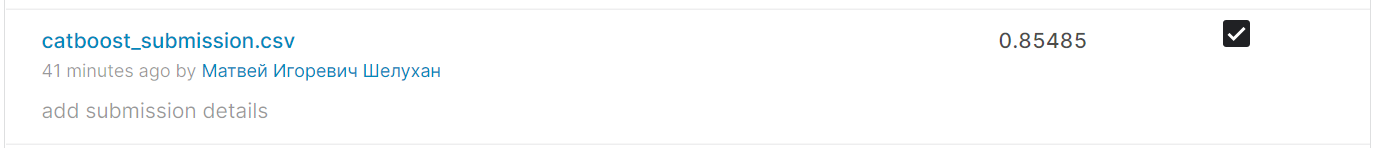